# Algorithms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import time
import random
from collections import deque
import heapq

### Time Complexity (Big O Notation):

This is the most common way to express algorithm difficulty. It describes how the runtime of an algorithm scales with the input size. Big O notation focuses on the dominant term and ignores constant factors.

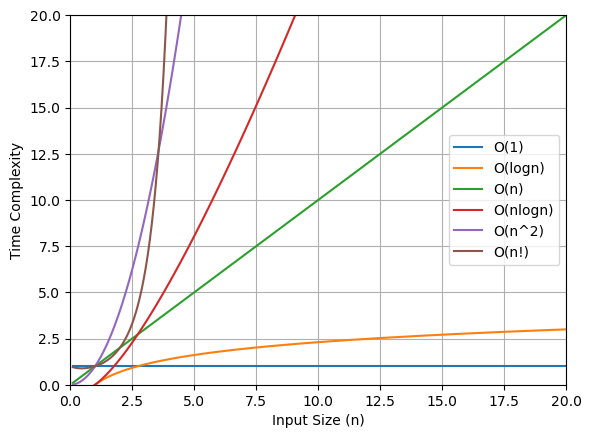

In [2]:
# O(1) plot
x = np.linspace(0.1, 50, 1000)
y = [1] * 1000
plt.plot(x, y)

# O(logn) plot
x_log = np.linspace(0.1, 50, 1000)
y_log = np.log(x_log)
plt.plot(x_log, y_log)

# O(n) plot
x = np.linspace(0.1, 25, 100)
y = x
plt.plot(x, y)

# O(nlogn) plot
x_log = np.linspace(0.1, 10, 100)
y_log = x_log * np.log(x_log)
plt.plot(x_log, y_log)

# O(n^2) plot
x = np.linspace(0.1, 5, 100)
y = x**2
plt.plot(x, y)

# O(n!) plot
x = np.linspace(0.1, 4, 50)
y = scipy.special.factorial(x)
plt.plot(x, y)

plt.xlabel('Input Size (n)')
plt.ylabel('Time Complexity')
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.legend(['O(1)', 'O(logn)','O(n)', 'O(nlogn)', 'O(n^2)', 'O(n!)'])
plt.grid(True)
plt.show()

## Function for calculating time complexity

In [7]:
def measure_time(func, *args, runs=10):  # Measure multiple runs for accuracy
    total_time = 0
    for _ in range(runs):
        start_time = time.perf_counter()
        func(*args)
        end_time = time.perf_counter()
        total_time += end_time - start_time
    return total_time / runs  # Average time

## Searching algorithms

In [13]:
# Linear search O(n)
# Examines each element in a list sequentially until the target value is found.
def linear_search(list, target):

    if not list:  # Handle empty list
        return -1
        
    inx = 0
    while inx < len(list):
        if list[inx] == target:
            return inx
        else:
            inx += 1
            
    return -1

# Binary search O(log n)
# Efficiently searches a sorted list by repeatedly dividing the search interval in half.
def binary_search(list, target):

    if not list:  # Handle empty list
        return -1
        
    list.sort() # Ensure the list is sorted
    inx0 = 0  # Lower bound
    inx_n = len(list) - 1  # Upper bound

    while inx0 <= inx_n:
        mid = (inx0 + inx_n) // 2
        if list[mid] == target:
            return mid
        elif list[mid] < target:
            inx0 = mid + 1
        else:
            inx_n = mid - 1
    return -1

# Interpolation Search O(log(log n))
# Similar to binary search but estimates the position of the target value based on its value relative to the range of values in the list.
def interpolation_search(list, target):

    if not list:  # Handle empty list
        return -1
    
    list.sort()  # Ensure the list is sorted
    inx0 = 0  # Lower bound
    inx_n = len(list) - 1  # Upper bound

    while inx0 <= inx_n and target >= list[inx0] and target <= list[inx_n]:

        if inx0 == inx_n:  # Handle case where inx0 and inx_n converge (by other words there's only 1 element in the list)
            if list[inx0] == target:
                return inx0
            else:
                return -1

        if list[inx0] == list[inx_n]:  # Handle case where all elements in the array are the same
            if list[inx0] == target:
                return inx0
            else:
                return -1
        
        # Calculating the probing position within the range based on the assumption of uniform distribution.
        mid = inx0 + ((inx_n - inx0) // (list[inx_n] - list[inx0])) * (target - list[inx0]) 

        if list[mid] == target:
            return mid
        elif list[mid] < target:
            inx0 = mid + 1 
        else:
            inx_n = mid - 1  # Correctly update the upper bound

    return -1

Linear Search n = 100, time = 2.4500011932104824e-06
Linear Search n = 10000, time = 0.00030892999493516984
Linear Search n = 50000, time = 0.0019285799993667752
Linear Search n = 100000, time = 0.003175799996824935
Linear Search n = 200000, time = 0.006047780014341697
Linear Search n = 300000, time = 0.009170680009992794
Linear Search n = 400000, time = 0.012134719995083287
Linear Search n = 500000, time = 0.015329049999127164
Binary Search n = 100, time = 1.0800024028867483e-06
Binary Search n = 10000, time = 2.171999658457935e-05
Binary Search n = 50000, time = 0.0001296499976888299
Binary Search n = 100000, time = 0.00025718999677337706
Binary Search n = 200000, time = 0.0006032800010871142
Binary Search n = 300000, time = 0.0009906399936880916
Binary Search n = 400000, time = 0.0015290700015611947
Binary Search n = 500000, time = 0.0019661900005303323
Interpolation Search n = 100, time = 9.399955160915852e-07
Interpolation Search n = 10000, time = 2.0840001525357366e-05
Interpolat

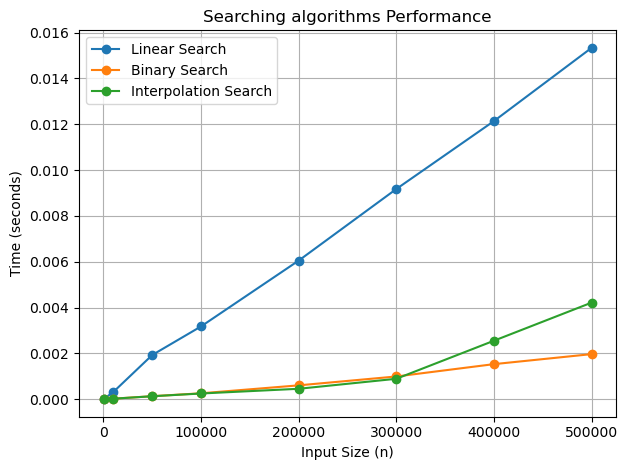

In [30]:
# Input sizes to test
n_values = [100, 10000, 50000, 100000, 200000, 300000, 400000, 500000]  # Increased range

# Measuring the complexity for searching algorithms
search_algs = [("Linear Search", linear_search), 
               ("Binary Search", binary_search),
               ("Interpolation Search", interpolation_search)]

for alg_name, alg in search_algs:
    times = []
    for n in n_values:
        arr = list(range(n))  # Create the array for each size
        target = n // 2  # A value that will be found (on average)
        time_taken = measure_time(alg, arr, target)
        times.append(time_taken)
        print(f"{alg_name} n = {n}, time = {time_taken}")  # Print intermediate results

    # Plotting
    plt.plot(n_values, times, marker='o', linestyle='-', label=alg_name)
    plt.legend()

# Optional: Plot a line representing O(n) for comparison
# You'll need to scale it appropriately to fit the graph
# Example:
# plt.plot(n_values, [x * times[0] / n_values[0] for x in n_values], linestyle='--', color='red', label='O(n)')

plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Searching algorithms Performance')
plt.grid(True)


# Optional: Use logarithmic scale if needed (if the times vary greatly)
# plt.xscale('log')  # Use if n_values span several orders of magnitude
# plt.yscale('log')  # Use if times vary by orders of magnitude

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


## Sorting algorithms

In [8]:
# Bubble Sort O(n^2)
# Repeatedly steps through the list, compares adjacent elements, and swaps them if they are in the wrong order.
def bubble_sort(arr):

    n = len(arr)
    for i in range(n):
        # Last i elements are already in place
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Insertion Sort O(n^2) in the worst case, O(n) in the best case
# Takes second element, compare with previous ones and if it's bigger, swap them. 
# Continue to do this with left elements which still less than current. Then repeat
def insertion_sort(arr):
    for i in range(1, len(arr)):  # Start from the second element
        key = arr[i]  # The current element to be inserted
    
        # Move elements of arr[0..i-1], that are greater than key, 
        # to one position ahead of their current position
        j = i-1
        while j >= 0 and arr[j] > key: 
            arr[j + 1] = arr[j]
            j -= 1
    
        # Insert the key at its correct position
        arr[j + 1] = key
    
    return arr

# Merge Sort O(n log n)
# Merge Sort is a divide-and-conquer algorithm. 
# It works by recursively dividing the unsorted list into smaller sublists 
# until each sublist contains only one element (which is inherently sorted). 
# Then, it repeatedly merges these sorted sublists to produce larger and 
# larger sorted sublists until the entire list is sorted. 
def merge_sort(arr):
    
    if len(arr) <= 1:
        return arr
        
    # Finding middle index of the array
    mid = len(arr)//2
    
    # Divide the array into two halves
    left_half = arr[:mid]
    right_half = arr[mid:]

    # Recursively sort the left and right halves
    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    # Merge the sorted halves
    result = []
    left_index = 0
    right_index = 0

    while left_index < len(left_half) and right_index < len(right_half):
        if left_half[left_index] <= right_half[right_index]:
            result.append(left_half[left_index])
            left_index += 1
        else:
            result.append(right_half[right_index])
            right_index += 1

    result.extend(left_half[left_index:])
    result.extend(right_half[right_index:])

    return result 

# Quick sort O(n log n)
# It selects a 'pivot' element, partitions the array around the pivot, 
# and then recursively sorts the sub-arrays to the left and right of the pivot.
def quick_sort(arr):

    if len(arr) <= 1:
         return arr

    # In out case pivot is a middle element
    pivot = arr[len(arr) // 2]

    # Creating three new lists: 
    #      - `left`: Elements smaller than the pivot.
    #      - `middle`: Elements equal to the pivot.
    #      - `right`: Elements greater than the pivot.
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    # Recursively sort the `left` and `right` sub-arrays.
    return quick_sort(left) + middle + quick_sort(right)

Bubble Sort n = 10, time = 2.929999027401209e-06
Bubble Sort n = 50, time = 4.6070001553744076e-05
Bubble Sort n = 100, time = 0.0001679799985140562
Bubble Sort n = 150, time = 0.0003986600029747933
Bubble Sort n = 200, time = 0.0006845700030680746
Bubble Sort n = 250, time = 0.0010773700021672993
Bubble Sort n = 300, time = 0.001549910008907318
Bubble Sort n = 350, time = 0.0021377000026404857
Insertion Sort n = 10, time = 1.1399970389902592e-06
Insertion Sort n = 50, time = 6.849999772384763e-06
Insertion Sort n = 100, time = 1.6870000399649145e-05
Insertion Sort n = 150, time = 3.471000236459077e-05
Insertion Sort n = 200, time = 6.560000474564731e-05
Insertion Sort n = 250, time = 9.127999655902385e-05
Insertion Sort n = 300, time = 0.00011996999965049326
Insertion Sort n = 350, time = 0.000196749996393919
Merge Sort n = 10, time = 6.569997640326619e-06
Merge Sort n = 50, time = 3.946999786421657e-05
Merge Sort n = 100, time = 8.728999528102576e-05
Merge Sort n = 150, time = 0.0001

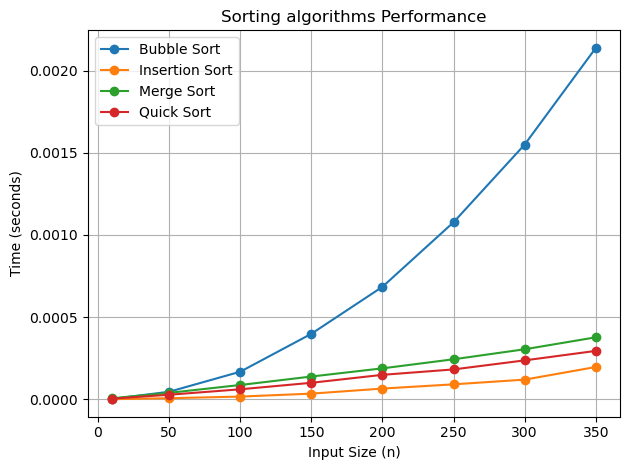

In [9]:
# Input sizes to test for sorting
n_values = [10, 50, 100, 150, 200, 250, 300, 350]  # Increased range

# Sorting algorithms
sorting_algs = [("Bubble Sort", bubble_sort),
                 ("Insertion Sort", insertion_sort),
                 ("Merge Sort", merge_sort),
                 ("Quick Sort", quick_sort)]

for alg_name, alg in sorting_algs:
  times = []
  for n in n_values:
    arr = list(range(n))  # Create and shuffle the array for each size
    random.shuffle(arr)
      
    # Measure time taken to sort the array
    time_taken = measure_time(alg, arr)
    times.append(time_taken)
    print(f"{alg_name} n = {n}, time = {time_taken}")  # Print intermediate results

  # Plotting
  plt.plot(n_values, times, marker='o', linestyle='-', label=alg_name)
  plt.legend()

# Optional: Plot a line representing O(n log n) for comparison (common for sorting algorithms)
# You'll need to scale it appropriately to fit the graph
# Example:
# plt.plot(n_values, [x * times[0] / (n_values[0] * math.log2(n_values[0])) for x in n_values], linestyle='--', color='red', label='O(n log n)')

plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Sorting algorithms Performance')
plt.grid(True)

# Optional: Use logarithmic scale if needed (if the times vary greatly)
# plt.xscale('log')  # Use if n_values span several orders of magnitude
# plt.yscale('log')  # Use if times vary by orders of magnitude (consider for sorting)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Hash Table Algorithm

A hash table is a data structure that uses a hash function to map keys to indices within an array. This allows for very fast lookups, insertions, and deletions. Time zomplexity if O(1) in the best scenario and O(n) in the worst scenario with a lot of collisions

In [1]:
class HashTable:
    def __init__(self, size):
        self.size = size # Creating an attributes
        self.table = [[] for _ in range(size)]  # Create an array of empty lists in attribute

    def hash_function(self, key):
        return key % self.size

    # Inserting key-value pair into the hash table.
    def insert(self, key, value):
  
        index = self.hash_function(key)
        self.table[index].append((key, value))

    # Getting the value associated with a given key.
    def get(self, key):
        index = self.hash_function(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        return None  # Key not found

    # Removing key-value pair from the hash table.
    def delete(self, key):
        index = self.hash_function(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index].pop(i)
                return # Key not found

# Example usage
ht = HashTable(10)  # Create a hash table with size 10
ht.insert(1, "apple")
ht.insert(2, "banana")
ht.insert(11, "cherry")  # Will hash to index 1

print(ht.get(1))
print(ht.get(11))
ht.delete(1)
print(ht.get(1))

apple
cherry
None


# Graphs
Graphs represent relationship between different objects where objects are nodes or vertices and connections are edges.

## Undirected Graph
In this type of graph edges have no direction and connection between nodes A and B implies a connection in both directions. 
This graph can be used in social network analysis and recommendation systems.
Also this graph used in such algorithms like:
* Breadth-First Search (BFS): Finding the shortest path in an unweighted graph, exploring all neighbors at the current level before moving to the next level.
* Depth-First Search (DFS): Traversing the graph by exploring as far as possible along each branch before backtracking. Used for finding connected components, cycle detection, and topological sorting.
* Minimum Spanning Tree (MST) Algorithms:
    * Prim's Algorithm: Builds the MST by iteratively adding the nearest unconnected vertex.
    * Kruskal's Algorithm: Builds the MST by adding the smallest weight edges without creating cycles.

``` mermaid
graph LR
    A-->B
    B-->A
    A-->C
    C-->A


## Directed Graph (Digraph)

In this type of graph edges have a direction, often represented by arrows.
A connection from A to B does not necessarily imply a connection from B to A.
This graph used in Web Page Ranking (analyzing hyperlink structure to determine the importance of web pages), Biological Networks (Modeling gene regulatory networks, protein-protein interactions), Workflow Analysis (Representing dependencies between tasks in a workflow).\
Also used in such algorithms like:
* Depth-First Search (DFS): Can be used for topological sorting (linear ordering of vertices in a DAG - Directed Acyclic Graph) to determine task dependencies.
* Dijkstra's Algorithm: Finds the shortest path from a single source node to all other nodes in a weighted graph with non-negative edge weights.
* Bellman-Ford Algorithm: Finds the shortest paths in a weighted graph, even with negative edge weights (but can detect negative weight cycles).


``` mermaid
graph LR
    A-->B
    B-->C
    C-->A

## Weighted Graph:

In this type of graph edges have associated weights (e.g., distances, costs).
These weights can represent distances, costs, or other numerical values.
This graph used in Transportation Network (Finding shortest paths between locations), Analyzing the strength of relationships between individuals.\
Also used in such algorithms like:
* Dijkstra's Algorithm: Finds the shortest path between two nodes in a weighted graph.
* A Search:* A more informed version of Dijkstra's, often used in pathfinding problems with heuristics (e.g., GPS navigation).
* Minimum Spanning Tree (MST) Algorithms: Used to find the minimum cost network that connects all nodes in the graph.

``` mermaid
graph LR
    A--5-->B
    B--3-->C
    C--2-->A

In [5]:
# Breadth-First Search (BFS) allows to find the shortest path in an unweighted graph, 
# exploring all neighbors at the current level before moving to the next level.
# Time Complexity: O(|V| + |E|), where |V| is the number of vertices and |E| is the number of edges.
# Args:
#        graph: A dictionary representing the graph, where keys are nodes and values are lists of neighbors.
#        start: The starting node for the search.
#    Returns:
#        A list of nodes visited in BFS order.
def bfs(graph, start):
    
    visited = set()  # Keep track of visited nodes
    queue = deque([start])  # Initialize queue with the starting node
    result = []

    while queue:
        node = queue.popleft()  # Dequeue the next node to visit
        if node not in visited:
            visited.add(node)
            result.append(node)
            for neighbor in graph[node]:
                queue.append(neighbor)

    return result

In [7]:
# Depth-First Search (DFS): Traversing the graph by exploring as far as possible along each branch before backtracking.
# Used for finding connected components, cycle detection, and topological sorting.
# Uses a stack (implicitly through recursion) to keep track of the nodes to visit.
# Time Complexity: O(|V| + |E|), where |V| is the number of vertices and |E| is the number of edges.
# Args:
#        graph: A dictionary representing the graph, where keys are nodes and values are lists of neighbors.
#        start: The starting node for the search.
#        visited: A set to keep track of visited nodes (optional).
#    Returns:
#        A list of nodes visited in BFS order.
def dfs(graph, start, visited=None):

    if visited is None:
        visited = set()

    visited.add(start)
    result = [start]

    for neighbor in graph[start]:
        if neighbor not in visited:
            result.extend(dfs(graph, neighbor, visited))

    return result

## Example data
### Nodes:

A: New York
B: Los Angeles
C: Chicago
D: Miami
E: Dallas
F: San Francisco

### Edges:

A-B
A-C
B-E
B-F
C-D
C-E
D-E

``` mermaid
graph LR
    A[New York]-->B[Los Angeles]
    A-->C[Chicago]
    B-->E[Dallas]
    B-->F[San Francisco]
    C-->D[Miami]
    C-->E
    D-->E

In [8]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'E', 'F'],
    'C': ['A', 'D', 'E'],
    'D': ['C', 'E'],
    'E': ['B', 'C', 'D'],
    'F': ['B']
}

# Perform BFS
bfs_result = bfs(graph, 'A')
print("BFS:", bfs_result) 

# Perform DFS
dfs_result = dfs(graph, 'A')
print("DFS:", dfs_result)

BFS: ['A', 'B', 'C', 'E', 'F', 'D']
DFS: ['A', 'B', 'E', 'C', 'D', 'F']


In [4]:
# Dijkstra's Algorithm
# Finds the shortest paths from a single source node to all other nodes in a weighted graph.
# Maintains a set of visited nodes. Iteratively selects the unvisited node with the shortest distance from the source.
# Updates distances to neighbors of the selected node if shorter paths are found.
# Time complexity is O((|V| + |E|) log |V|), where:|V| is the number of vertices in the graph. |E| is the number of edges in the graph.
#  Args:
#        graph: A dictionary representing the graph, 
#               where keys are nodes and values are dictionaries of neighbors and their weights.
#        start: The starting node.

def dijkstra(graph, start):

    distances = {node: float('inf') for node in graph}  # Initialize distances to infinity
    distances[start] = 0  # Distance from start to itself is 0
    priority_queue = [(0, start)]  # Priority queue to track nodes with shortest distances
    visited = set()

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)  # Get node with the shortest distance

        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

### Example data

``` mermaid
graph LR
    A--1-->B
    A--4-->C
    B--1-->A
    B--2-->C
    B--5-->D
    C--4-->A
    C--2-->B
    C--1-->D
    D--5-->B
    D--1-->C

In [6]:
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

start_node = 'A'
shortest_distances = dijkstra(graph, start_node)
print(f"Shortest distances from {start_node}: {shortest_distances}")

# {'A': 0}: The shortest distance from node 'A' to itself is 0.
#{'B': 1}: The shortest distance from node 'A' to node 'B' is 1.
#{'C': 3}: The shortest distance from node 'A' to node 'C' is 3.
#{'D': 4}: The shortest distance from node 'A' to node 'D' is 4.

Shortest distances from A: {'A': 0, 'B': 1, 'C': 3, 'D': 4}


In [9]:
# Bellman-Ford Algorithm
# Finds the shortest paths from a single source node to all other nodes in a weighted graph, even if the graph contains negative edge weights.
# Relaxes edges repeatedly. In each iteration, it checks if the distance to a node can be shortened by going through a different path.
# Detects negative weight cycles (cycles where the sum of edge weights is negative).
# Time Complexity: O(|V| * |E|) |V|: Number of vertices in the graph |E|: Number of edges in the graph
# Args:
#     graph: A dictionary representing the graph,  where keys are nodes and values are lists of tuples (neighbor, weight). 
#     source: The starting node.

def bellman_ford(graph, source):

    num_vertices = len(graph) # number of vertices (nodes) in the graph
    distances = {node: float('inf') for node in graph} # initializes a dictionary to store the shortest distances
    distances[source] = 0 # sets the distance from the source node to itself to 0

    for _ in range(num_vertices - 1):  # Relax all edges |V| - 1 times
        for node in graph:
            for neighbor, weight in graph[node]:
                if distances[node] + weight < distances[neighbor]:
                    distances[neighbor] = distances[node] + weight

    # Check for negative weight cycles
    for node in graph:
        for neighbor, weight in graph[node]:
            if distances[node] + weight < distances[neighbor]:
                return distances, False  # Negative weight cycle detected

    return distances, True

## Example data
``` mermaid
graph LR
    A-->-1-->B
    A-->4-->C
    B-->3-->C
    B-->2-->D
    C-->-2-->B

In [10]:
graph = {
    'A': [('B', -1), ('C', 4)],
    'B': [('C', 3), ('D', 2)],
    'C': [('B', -2)],
    'D': []
}

source_node = 'A'
distances, has_negative_cycle = bellman_ford(graph, source_node)

if has_negative_cycle:
    print("Negative weight cycle detected.")
print(f"Shortest distances from {source_node}: {distances}")

Negative weight cycle detected.
Shortest distances from A: {'A': 0, 'B': -1, 'C': 2, 'D': 1}
